In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(
    "CSR_koyou_2017_2021.csv", encoding="cp932", dtype={"証券コード": str}
)
df2 = pd.read_csv("CSR_koyou_2022.csv", encoding="cp932", dtype={"証券コード": str})

/tmp/ipykernel_1100/1882905152.py:1: DtypeWarning: Columns (86,157,232,346) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(


In [3]:
colums_name = [
    "証券コード",
    "年版",
    "同・男女計・内訳(自己都合)",
    "従業員数合計/前期",
    "月平均残業時間",
    "有休取得率/前期",
    "メンタルヘルスに伴う休職者数/前期",
    "管理職・女性比率",
    "平均年間給与/前期",
    "平均年齢合計/前期",
]

In [4]:
df1_drop_column = df1[colums_name].dropna()
df2_drop_column = df2[colums_name].dropna()

In [ ]:
df = pd.concat([df1_drop_column, df2_drop_column], ignore_index=True)  # noqa: PD901
df

,証券コード,年版,同・男女計・内訳(自己都合),従業員数合計/前期,月平均残業時間,有休取得率/前期,メンタルヘルスに伴う休職者数/前期,管理職・女性比率,平均年間給与/前期,平均年齢合計/前期
0,5851,2017,13.0,1754.0,18.6,61.3,13.0,0.0,6201719.0,42.6
1,5851,2018,22.0,1749.0,21.3,60.6,13.0,0.0,6540939.0,42.5
2,5851,2019,14.0,1669.0,23.0,60.1,11.0,3.5,6633261.0,42.5
3,5851,2020,25.0,1681.0,25.2,62.6,11.0,3.9,6795199.0,42.4
4,5851,2021,30.0,1751.0,20.0,65.1,11.0,3.8,6870861.0,42.5
...,...,...,...,...,...,...,...,...,...,...
3488,2427,2022,824.0,9844.0,14.2,74.4,38.0,5.2,3333687.0,40.6
3489,2198,2022,0.0,844.0,11.0,52.8,0.0,19.0,3769273.0,28.7
3490,4544,2022,252.0,4851.0,17.1,48.2,41.0,13.4,5902994.0,40.9
3491,2331,2022,405.0,11861.0,36.0,53.1,29.0,4.0,5797477.0,40.5


In [6]:
df_fusai = pd.read_csv("きれいなデータ/負債比率_年度別.csv")
df_fusai = df_fusai.drop(columns="Unnamed: 0")
df_fusai = df_fusai.rename(columns={"fiscal_year": "年版"})
df_fusai

,code,年版,fusaiRate
0,1301,2016,304.17
1,1301,2017,289.88
2,1301,2018,300.69
3,1301,2019,289.09
4,1301,2020,224.92
...,...,...,...
5181,9845,2017,87.97
5182,9845,2018,80.29
5183,9845,2019,62.83
5184,9845,2020,59.04


In [7]:
df_rename = df.rename(columns={df.columns[0]: "code"})
df_rename

,code,年版,同・男女計・内訳(自己都合),従業員数合計/前期,月平均残業時間,有休取得率/前期,メンタルヘルスに伴う休職者数/前期,管理職・女性比率,平均年間給与/前期,平均年齢合計/前期
0,5851,2017,13.0,1754.0,18.6,61.3,13.0,0.0,6201719.0,42.6
1,5851,2018,22.0,1749.0,21.3,60.6,13.0,0.0,6540939.0,42.5
2,5851,2019,14.0,1669.0,23.0,60.1,11.0,3.5,6633261.0,42.5
3,5851,2020,25.0,1681.0,25.2,62.6,11.0,3.9,6795199.0,42.4
4,5851,2021,30.0,1751.0,20.0,65.1,11.0,3.8,6870861.0,42.5
...,...,...,...,...,...,...,...,...,...,...
3488,2427,2022,824.0,9844.0,14.2,74.4,38.0,5.2,3333687.0,40.6
3489,2198,2022,0.0,844.0,11.0,52.8,0.0,19.0,3769273.0,28.7
3490,4544,2022,252.0,4851.0,17.1,48.2,41.0,13.4,5902994.0,40.9
3491,2331,2022,405.0,11861.0,36.0,53.1,29.0,4.0,5797477.0,40.5


In [8]:
df_fusai["code"] = df_fusai["code"].astype(str)
df_rename["code"] = df_rename["code"].astype(str)

df_merge = df_rename.merge(df_fusai, on=["code", "年版"], how="left")

In [9]:
df_merge_dropna = df_merge.dropna().reset_index(drop=True)
df_merge_dropna

,code,年版,同・男女計・内訳(自己都合),従業員数合計/前期,月平均残業時間,有休取得率/前期,メンタルヘルスに伴う休職者数/前期,管理職・女性比率,平均年間給与/前期,平均年齢合計/前期,fusaiRate
0,5851,2017,13.0,1754.0,18.6,61.3,13.0,0.0,6201719.0,42.6,111.23
1,5851,2018,22.0,1749.0,21.3,60.6,13.0,0.0,6540939.0,42.5,116.91
2,5851,2019,14.0,1669.0,23.0,60.1,11.0,3.5,6633261.0,42.5,113.04
3,5851,2020,25.0,1681.0,25.2,62.6,11.0,3.9,6795199.0,42.4,119.75
4,5851,2021,30.0,1751.0,20.0,65.1,11.0,3.8,6870861.0,42.5,133.84
...,...,...,...,...,...,...,...,...,...,...,...
976,4980,2021,31.0,1604.0,19.4,68.4,12.0,2.8,6657092.0,43.9,108.89
977,2060,2017,13.0,502.0,14.7,44.6,5.0,0.6,6152551.0,36.8,144.52
978,2060,2020,18.0,497.0,10.7,50.2,3.0,1.4,6724000.0,38.6,113.03
979,2060,2021,17.0,514.0,8.9,55.7,2.0,1.6,6634000.0,39.3,126.65


In [ ]:
import numpy as np

df_merge_dropna["自己都合離職率"] = (
    df_merge_dropna["同・男女計・内訳(自己都合)"] / df_merge_dropna["従業員数合計/前期"]
)

df_merge_dropna["メンタルヘルス休職者率"] = (
    df_merge_dropna["メンタルヘルスに伴う休職者数/前期"]
    / df_merge_dropna["従業員数合計/前期"]
)
df_merge_dropna["平均年間給与/前期（対数）"] = df_merge_dropna[  # noqa: RUF001
    "平均年間給与/前期"
].apply(np.log10)
df_merge_dropna["従業員数合計/前期（対数）"] = df_merge_dropna[  # noqa: RUF001
    "従業員数合計/前期"
].apply(np.log10)
df_merge_dropna

,code,年版,同・男女計・内訳(自己都合),従業員数合計/前期,月平均残業時間,有休取得率/前期,メンタルヘルスに伴う休職者数/前期,管理職・女性比率,平均年間給与/前期,平均年齢合計/前期,fusaiRate,自己都合離職率,メンタルヘルス休職者率,平均年間給与/前期（対数）,従業員数合計/前期（対数）
0,5851,2017,13.0,1754.0,18.6,61.3,13.0,0.0,6201719.0,42.6,111.23,0.007412,0.007412,6.792512,3.244030
1,5851,2018,22.0,1749.0,21.3,60.6,13.0,0.0,6540939.0,42.5,116.91,0.012579,0.007433,6.815640,3.242790
2,5851,2019,14.0,1669.0,23.0,60.1,11.0,3.5,6633261.0,42.5,113.04,0.008388,0.006591,6.821727,3.222456
3,5851,2020,25.0,1681.0,25.2,62.6,11.0,3.9,6795199.0,42.4,119.75,0.014872,0.006544,6.832202,3.225568
4,5851,2021,30.0,1751.0,20.0,65.1,11.0,3.8,6870861.0,42.5,133.84,0.017133,0.006282,6.837011,3.243286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4980,2021,31.0,1604.0,19.4,68.4,12.0,2.8,6657092.0,43.9,108.89,0.019327,0.007481,6.823285,3.205204
977,2060,2017,13.0,502.0,14.7,44.6,5.0,0.6,6152551.0,36.8,144.52,0.025896,0.009960,6.789055,2.700704
978,2060,2020,18.0,497.0,10.7,50.2,3.0,1.4,6724000.0,38.6,113.03,0.036217,0.006036,6.827628,2.696356
979,2060,2021,17.0,514.0,8.9,55.7,2.0,1.6,6634000.0,39.3,126.65,0.033074,0.003891,6.821775,2.710963


In [11]:
df_no_hazure = df_merge_dropna.drop(
    columns=[
        "同・男女計・内訳(自己都合)",
        "メンタルヘルスに伴う休職者数/前期",
        "平均年間給与/前期",
        "従業員数合計/前期",
    ]
)

In [12]:
df_no_hazure

,code,年版,月平均残業時間,有休取得率/前期,管理職・女性比率,平均年齢合計/前期,fusaiRate,自己都合離職率,メンタルヘルス休職者率,平均年間給与/前期（対数）,従業員数合計/前期（対数）
0,5851,2017,18.6,61.3,0.0,42.6,111.23,0.007412,0.007412,6.792512,3.244030
1,5851,2018,21.3,60.6,0.0,42.5,116.91,0.012579,0.007433,6.815640,3.242790
2,5851,2019,23.0,60.1,3.5,42.5,113.04,0.008388,0.006591,6.821727,3.222456
3,5851,2020,25.2,62.6,3.9,42.4,119.75,0.014872,0.006544,6.832202,3.225568
4,5851,2021,20.0,65.1,3.8,42.5,133.84,0.017133,0.006282,6.837011,3.243286
...,...,...,...,...,...,...,...,...,...,...,...
976,4980,2021,19.4,68.4,2.8,43.9,108.89,0.019327,0.007481,6.823285,3.205204
977,2060,2017,14.7,44.6,0.6,36.8,144.52,0.025896,0.009960,6.789055,2.700704
978,2060,2020,10.7,50.2,1.4,38.6,113.03,0.036217,0.006036,6.827628,2.696356
979,2060,2021,8.9,55.7,1.6,39.3,126.65,0.033074,0.003891,6.821775,2.710963


In [13]:
df_jikotsugou = df_no_hazure[["code", "年版", "自己都合離職率"]]
df_jikotsugou.loc[:, "年版"] = df_jikotsugou["年版"] + 1
df_jikotsugou.nunique()

code       258
年版           5
自己都合離職率    936
dtype: int64

In [14]:
df_drop_jikotsugou = df_no_hazure.drop(columns="自己都合離職率")
df_no_hazure2 = df_drop_jikotsugou.merge(df_jikotsugou, on=["code", "年版"])
df_no_hazure2

,code,年版,月平均残業時間,有休取得率/前期,管理職・女性比率,平均年齢合計/前期,fusaiRate,メンタルヘルス休職者率,平均年間給与/前期（対数）,従業員数合計/前期（対数）,自己都合離職率
0,5851,2018,21.3,60.6,0.0,42.5,116.91,0.007433,6.815640,3.242790,0.007412
1,5851,2019,23.0,60.1,3.5,42.5,113.04,0.006591,6.821727,3.222456,0.012579
2,5851,2020,25.2,62.6,3.9,42.4,119.75,0.006544,6.832202,3.225568,0.008388
3,5851,2021,20.0,65.1,3.8,42.5,133.84,0.006282,6.837011,3.243286,0.014872
4,4202,2020,17.6,70.6,3.9,41.3,125.64,0.003304,6.886173,3.383995,0.011470
...,...,...,...,...,...,...,...,...,...,...,...
701,4929,2020,15.0,49.3,13.8,33.7,24.29,0.000000,6.779450,2.110590,0.000000
702,4929,2021,16.1,53.5,11.1,34.6,13.61,0.024793,6.768998,2.082785,0.077519
703,4980,2020,22.0,67.2,2.7,43.6,90.73,0.007486,6.842415,3.204934,0.034700
704,4980,2021,19.4,68.4,2.8,43.9,108.89,0.007481,6.823285,3.205204,0.021834


In [15]:
df_no_hazure2.to_csv("きれいなデータ/外れ値処理前.csv", encoding="cp932")

<Figure size 1e+07x1e+07 with 0 Axes>

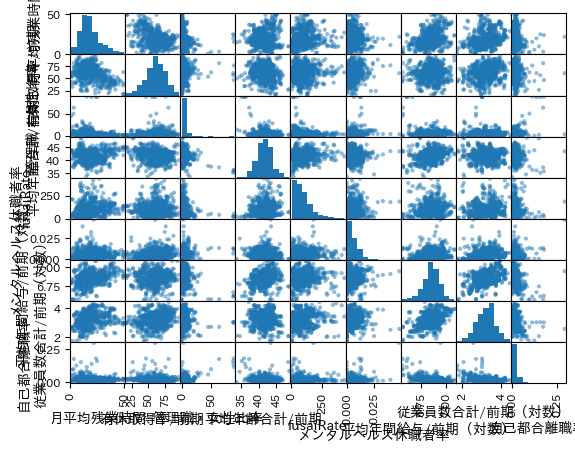

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure(figsize=(100000, 100000), layout="tight")
scatter_matrix(df_no_hazure2.iloc[:, 2:])
plt.show()
plt.savefig("散布図行列.png")

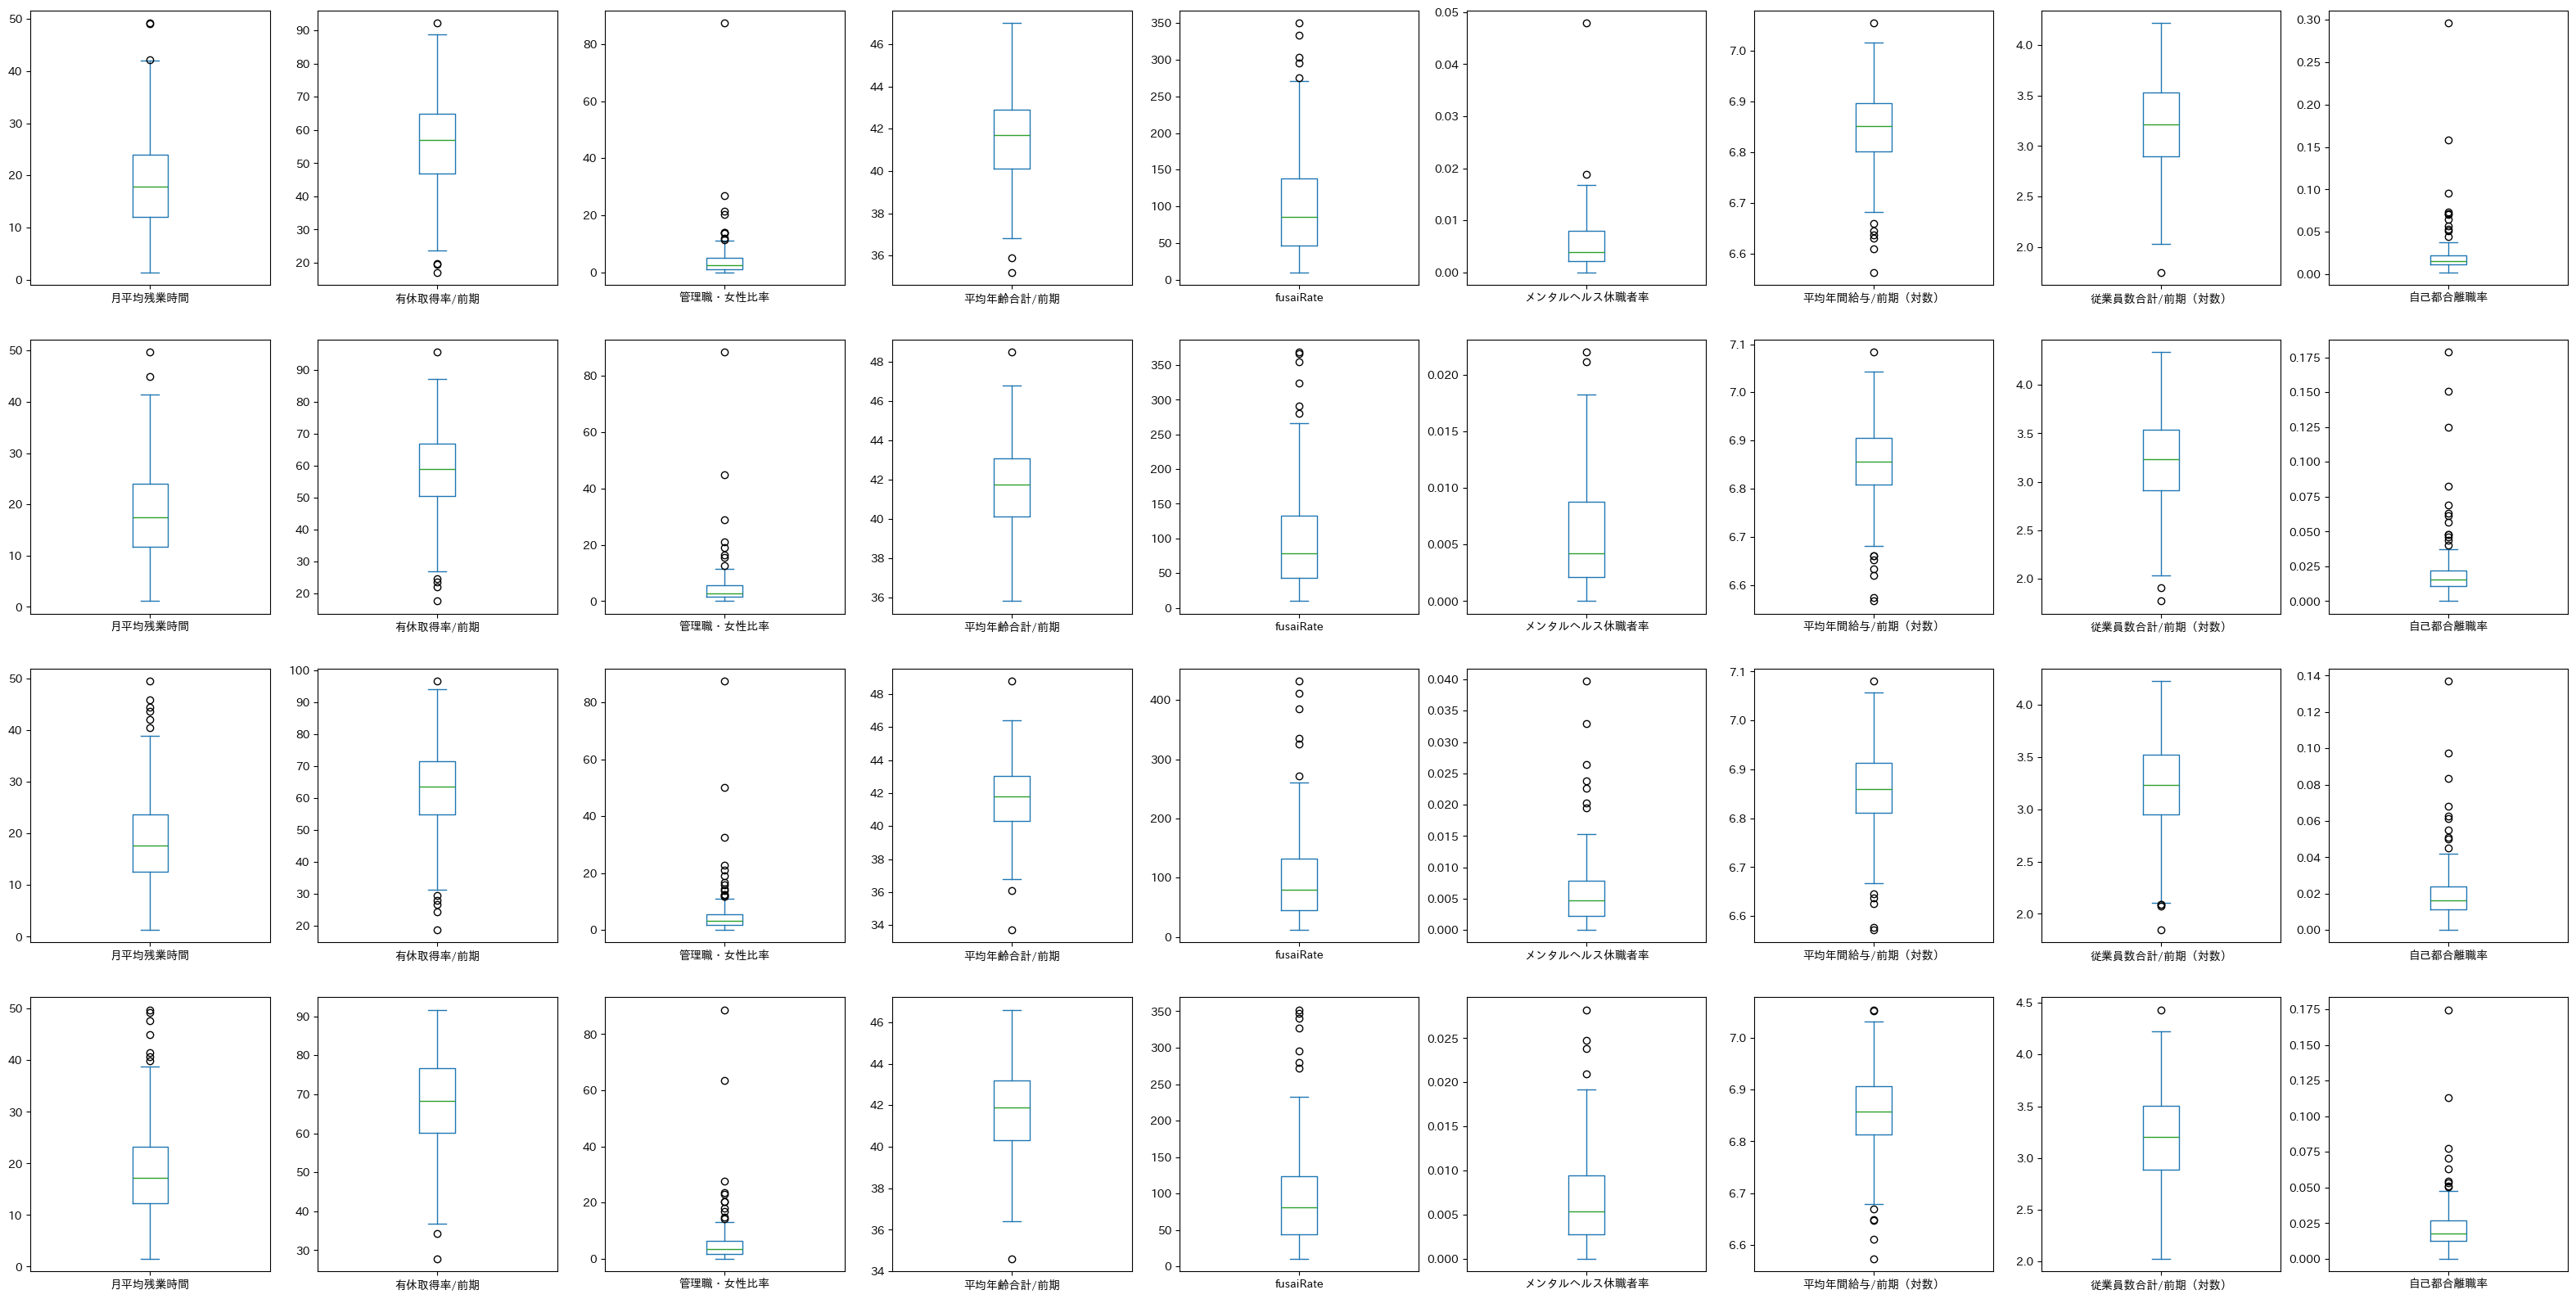

In [17]:
fig = plt.figure(figsize=(40, 20))
k = 0
for i in range(4):
    for j in range(9):
        k += 1
        ax = fig.add_subplot(4, 9, k)
        df_no_hazure2[df_no_hazure2["年版"] == 2018 + i].iloc[:, j + 2].plot.box()

plt.show()

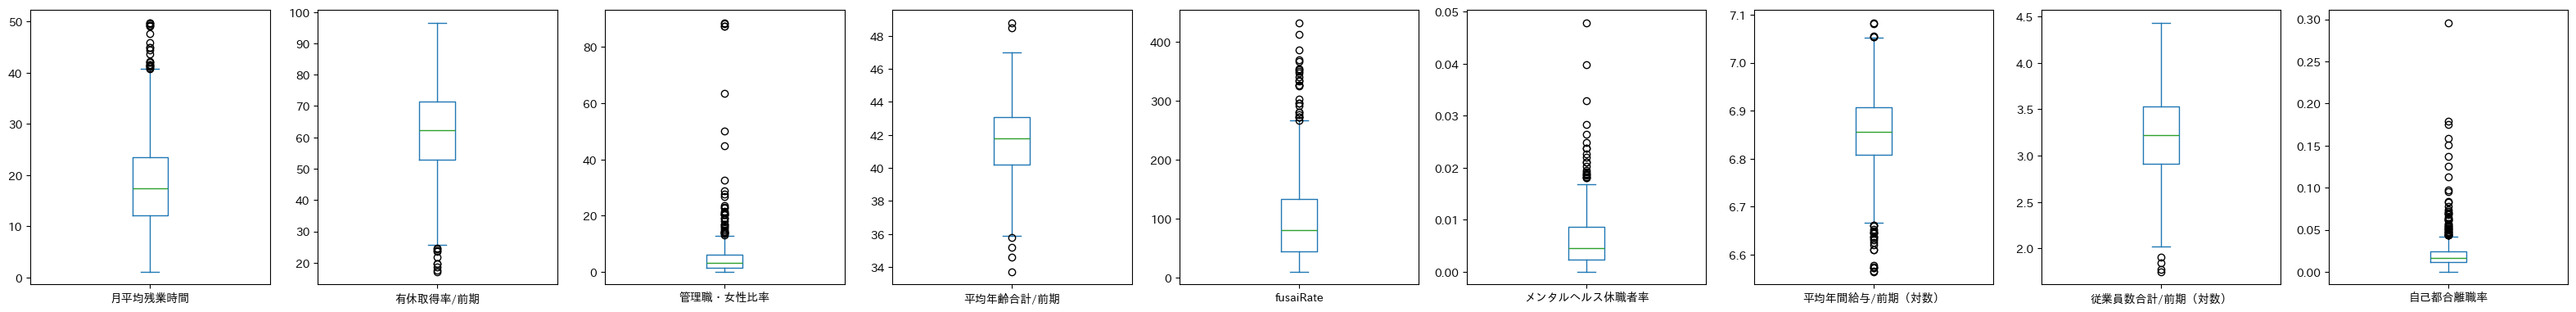

In [20]:
fig2 = plt.figure(figsize=(40, 20))
k = 0

for j in range(9):
    k += 1
    ax = fig2.add_subplot(4, 9, k)
    df_no_hazure2.iloc[:, j + 2].plot.box()

plt.show()